# Case Study 2 : Analyzing data from MovieLens

** Due Date: October 27, 2016 5:59PM**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [ ]:
from IPython.lib.display import YouTubeVideo

In [ ]:
YouTubeVideo('dAjRNi6bhSE')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Shi He
    
    Meng Wang
    
    You Zhou
    
    Xiao-Qun Wang
    
    Zili MA
    

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [ ]:
# Means are not accurancy it proves not thing means do not converge very qucikly
# covariance between men and women -------------- linearly
# represent to do the prediction
# use the plot to show the relationships between the 
# corvariance close to 1 or -1 is good for predictive linearly 
# corelation always! do not normalize it
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
import pandas as pd
import numpy as np
column = ['MovieID','Title','Genres']
movie = pd.read_csv('movies.dat',sep='::',header=None, names=column,engine='python',encoding='latin_1')
column = ['UserID','MovieID','Rating','Timestamp']
rate = pd.read_csv('ratings.dat',sep='::',header=None, names=column,engine='python')
column = ['UserID','Gender','Age','Occupation','Zip-code']
user = pd.read_csv('users.dat',sep='::',header=None, names=column,engine='python')
data = pd.merge(movie,rate,on=['MovieID'])
data = pd.merge(data,user,on=['UserID'])
print('Complete merge')
print('moveis:',movie.shape)
print('user:',user.shape)
print('rate:',rate.shape)
print('total set:',data.shape)
# add a new column called year
year_series = [int(item.split('(')[-1].split(')')[0]) for item in data['Title']]
data['Year'] = year_series
store = pd.HDFStore('data.h5')
store['data']=data

In [2]:
# load data from hdf5 file
import pprint as pp
import pandas as pd
import numpy as np
import scipy.sparse
import matplotlib.pylab as plt
%matplotlib inline
data = pd.read_hdf('data.h5')

In [2]:
# How many movies have an average rating over 4.5 overall?
grouped = data.groupby('Title')
rating = grouped['Rating'].aggregate(np.mean)
rating = rating.sort_values(ascending=False)
rating = rating.select(lambda x:rating[x]>4.5)
pp.pprint(rating)
print('Total:',len(rating))

Title
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Smashing Time (1967)                                                   5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Bittersweet Motel (2000)                                               5.000000
Baby, The (1973)                                                       5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [3]:
# How many movies have an average rating over 4.5 among men? 
male_data = data[data.Gender != 'F']
grouped = male_data.groupby('Title')
rating = grouped['Rating'].aggregate(np.mean)
rating = rating.sort_values(ascending=False)
rating = rating.select(lambda x:rating[x]>4.5)
pp.pprint(rating)
print('Total:',len(rating))

Title
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Angela (1995)                                                          5.000000
Small Wonders (1996)                                                   5.000000
Baby, The (1973)                                                       5.000000
Smashing Time (1967)                                                   5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Dangerous Game (1993)                                                  5.000000
Bells, The (1926)                                                      5.000000
Time of the Gypsies (Dom za vesanje) (1989)                            4.833333
I Am Cuba (Soy Cuba/Ya Kuba) (1964

In [4]:
# How about women?
female_data = data[data.Gender != 'M']
grouped = female_data.groupby('Title')
rating = grouped['Rating'].aggregate(np.mean)
rating = rating.sort_values(ascending=False)
rating = rating.select(lambda x:rating[x]>4.5)
pp.pprint(rating)
print('Total:',len(rating))

Title
Lamerica (1994)                                            5.000000
Brother, Can You Spare a Dime? (1975)                      5.000000
Other Side of Sunday, The (Søndagsengler) (1996)           5.000000
Ayn Rand: A Sense of Life (1997)                           5.000000
For the Moment (1994)                                      5.000000
Country Life (1994)                                        5.000000
Belly (1998)                                               5.000000
Clean Slate (Coup de Torchon) (1981)                       5.000000
Woman of Paris, A (1923)                                   5.000000
Coldblooded (1995)                                         5.000000
Ballad of Narayama, The (Narayama Bushiko) (1958)          5.000000
Skipped Parts (2000)                                       5.000000
Message to Love: The Isle of Wight Festival (1996)         5.000000
Saltmen of Tibet, The (1997)                               5.000000
Dancemaker (1998)                         

In [5]:
# How many movies have an median rating over 4.5 among men over age 30? 
male_data = data[data.Gender != 'F']
male_data = male_data[male_data.Age >= 30]
grouped = male_data.groupby('Title')
rating = grouped['Rating'].aggregate(np.median)
rating = rating.sort_values(ascending=False)
rating = rating.select(lambda x:rating[x]>4.5)
pp.pprint(rating)
print('Total:',len(rating))

Title
City Lights (1931)                                                             5.0
Usual Suspects, The (1995)                                                     5.0
It's a Wonderful Life (1946)                                                   5.0
Time of the Gypsies (Dom za vesanje) (1989)                                    5.0
Citizen Kane (1941)                                                            5.0
Hearts and Minds (1996)                                                        5.0
Wallace & Gromit: The Best of Aardman Animation (1996)                         5.0
Silence of the Lambs, The (1991)                                               5.0
Godfather, The (1972)                                                          5.0
Godfather: Part II, The (1974)                                                 5.0
Chushingura (1962)                                                             5.0
Among Giants (1998)                                                            5.

In [26]:
# How about women over age 30?
female_data = data[data.Gender != 'M']
female_data = female_data[female_data.Age >= 30]
grouped = female_data.groupby('Title')
rating = grouped['Rating'].aggregate(np.mean)
rating = rating.sort_values(ascending=False)
rating = rating.select(lambda x:rating[x]>4.5)
pp.pprint(rating)
print('Total:',len(rating))

Title
Taste of Cherry (1997)                                            5.000000
24 7: Twenty Four Seven (1997)                                    5.000000
Perils of Pauline, The (1947)                                     5.000000
Gambler, The (A Játékos) (1997)                                   5.000000
Grandfather, The (El Abuelo) (1998)                               5.000000
Before the Rain (Pred dozhdot) (1994)                             5.000000
Paris, France (1993)                                              5.000000
Cold Fever (Á köldum klaka) (1994)                                5.000000
Belly (1998)                                                      5.000000
Paradine Case, The (1947)                                         5.000000
Palookaville (1996)                                               5.000000
Saltmen of Tibet, The (1997)                                      5.000000
Cleo From 5 to 7 (Cléo de 5 à 7) (1962)                           5.000000
Other Side of Sunda


# Movies have an average rating over 4.5 overall
- All   Total: 21
- Men   Total: 23
- Women Total: 51

# Movies have an mean rating over 4.5 
- Men   Total: 86
- Women Total: 72

In [7]:
# how we define popular?
# should we count those old films in?
# old films never die, but we want to see something relatively new to the rating people
# so we made a list of new popular films
temp_popular = data.loc[data['Year']>1995]
print(temp_popular.groupby('Title').size().sort_values(ascending=False)[1:10])

Title
Saving Private Ryan (1998)                          2653
Matrix, The (1999)                                  2590
Men in Black (1997)                                 2538
Fargo (1996)                                        2513
Sixth Sense, The (1999)                             2459
Shakespeare in Love (1998)                          2369
L.A. Confidential (1997)                            2288
Star Wars: Episode I - The Phantom Menace (1999)    2250
Being John Malkovich (1999)                         2241
dtype: int64


In [8]:
# and these are the popular movie relatively old
temp_popular = data.loc[data['Year']<1995]
print(temp_popular.groupby('Title').size().sort_values(ascending=False)[1:10])

Title
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Terminator 2: Judgment Day (1991)                        2649
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Raiders of the Lost Ark (1981)                           2514
Princess Bride, The (1987)                               2318
Schindler's List (1993)                                  2304
dtype: int64


In [9]:
rating_count = data.groupby('Title').size()
active_titles = rating_count.index[rating_count >= 2000]
data.loc[data['Title'].isin(active_titles)].groupby('Title')['Rating'].mean().sort_values(ascending=False)

Title
Shawshank Redemption, The (1994)                         4.554558
Godfather, The (1972)                                    4.524966
Schindler's List (1993)                                  4.510417
Raiders of the Lost Ark (1981)                           4.477725
Star Wars: Episode IV - A New Hope (1977)                4.453694
Sixth Sense, The (1999)                                  4.406263
Silence of the Lambs, The (1991)                         4.351823
Saving Private Ryan (1998)                               4.337354
American Beauty (1999)                                   4.317386
Matrix, The (1999)                                       4.315830
Princess Bride, The (1987)                               4.303710
Star Wars: Episode V - The Empire Strikes Back (1980)    4.292977
Pulp Fiction (1994)                                      4.278213
Fargo (1996)                                             4.254676
Braveheart (1995)                                        4.234957
L.A.

# Popular: High rating numbers but also high rating nums

In [10]:
# Make some conjectures about how easy various groups are to please? Support your answers with data!
# For example, one might conjecture that people between the ages of 1 and 10 are the easiest to 
# please since they are all young children. This conjecture may or may not be true, but how would you support
# or disprove either conclusion with with data?
total_genres = set()
for item in data['Genres']:
    total_genres.add(item)

In [59]:
#categorize data by genres
age = [n for n in range(1,61)]
age = [age[i:i+10] for i in range(0,60,10)]
df = pd.DataFrame({'A' : []})
df_count = pd.DataFrame({'A' : []})
for x in age:
    temp = data.loc[data['Age'].isin(x)].groupby('Genres')['Rating'].mean()
    temp_count = data.loc[data['Age'].isin(x)].groupby('Genres')['Rating'].count()
    age_str = str(x[0])+'-'+str(x[-1])
    if df.empty:
        df = temp.to_frame(name=age_str)
        df_count = temp_count.to_frame(name=age_str+' Count')
    else:
        df = pd.concat([df, temp.to_frame(name=age_str)], join='outer', axis=1)
        df_count = pd.concat([df_count, temp_count.to_frame(name=age_str+'Count')], join='outer', axis=1)

In [12]:
#categorize data by genres and by genders
male_data = data[data.Gender != 'F']
male_df = pd.DataFrame({'A' : []})
male_df_count = pd.DataFrame({'A' : []})
for x in age:
    temp = male_data.loc[male_data['Age'].isin(x)].groupby('Genres')['Rating'].mean()
    temp_count = male_data.loc[male_data['Age'].isin(x)].groupby('Genres')['Rating'].count()
    age_str = str(x[0])+'-'+str(x[-1])
    if male_df.empty:
        male_df = temp.to_frame(name=age_str)
        male_df_count = temp_count.to_frame(name=age_str+' Count')
    else:
        male_df = pd.concat([male_df, temp.to_frame(name=age_str)], join='outer', axis=1)
        male_df_count = pd.concat([male_df_count, temp_count.to_frame(name=age_str+'Count')], join='outer', axis=1)

In [13]:
#categorize data by genres and by genders
female_data = data[data.Gender != 'M']
female_df = pd.DataFrame({'A' : []})
female_df_count = pd.DataFrame({'A' : []})
for x in age:
    temp = female_data.loc[female_data['Age'].isin(x)].groupby('Genres')['Rating'].mean()
    temp_count = female_data.loc[female_data['Age'].isin(x)].groupby('Genres')['Rating'].count()
    age_str = str(x[0])+'-'+str(x[-1])
    if female_df.empty:
        female_df = temp.to_frame(name=age_str)
        female_df_count = temp_count.to_frame(name=age_str+' Count')
    else:
        female_df = pd.concat([female_df, temp.to_frame(name=age_str)], join='outer', axis=1)
        female_df_count = pd.concat([female_df_count, temp_count.to_frame(name=age_str+'Count')], join='outer', axis=1)

In [14]:
df.mean(axis=1)

Action                                           3.403493
Action|Adventure                                 3.675361
Action|Adventure|Animation                       4.126535
Action|Adventure|Animation|Children's|Fantasy    2.807277
Action|Adventure|Animation|Horror|Sci-Fi         3.472576
Action|Adventure|Children's                      1.279645
Action|Adventure|Children's|Comedy               2.315385
Action|Adventure|Children's|Fantasy              2.401697
Action|Adventure|Children's|Sci-Fi               2.031501
Action|Adventure|Comedy                          3.036085
Action|Adventure|Comedy|Crime                    3.205414
Action|Adventure|Comedy|Horror                   3.441642
Action|Adventure|Comedy|Horror|Sci-Fi            3.646648
Action|Adventure|Comedy|Romance                  3.873597
Action|Adventure|Comedy|Sci-Fi                   3.789771
Action|Adventure|Comedy|War                      2.314867
Action|Adventure|Crime                           2.992690
Action|Adventu

In [15]:
# the most welcome movie genres
print("the most welcome movie genres",df.mean(axis=1).idxmax(),"Mean Score:",df.mean(axis=1).max())

the most welcome movie genres Sci-Fi|War Mean Score: 4.46232859726


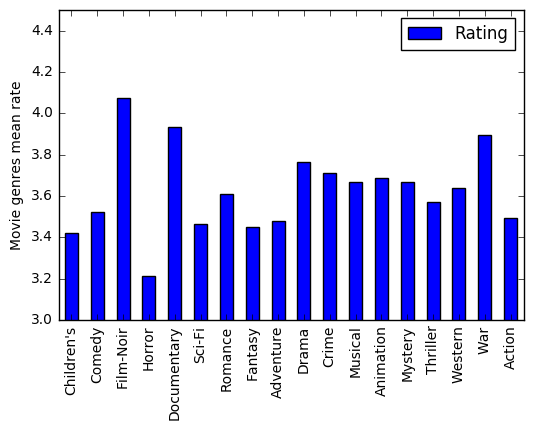

In [25]:
unique_genres = set()
for item in data['Genres']:
    for n in item.split('|'):
        unique_genres.add(n)
ratings = {}
for n in unique_genres:
    favorite_genres = data.loc[data['Genres'].str.contains(n)]
    ratings[n] = favorite_genres['Rating'].mean()
genres = pd.DataFrame.from_dict(ratings,orient='index')
genres.columns =['Rating'] 
ax = genres.plot.bar(ylim=3)
ax.set_ylabel('Movie genres mean rate')

Age grounp with highest mean rating: 51-60 Mean of rating: 3.49140363828


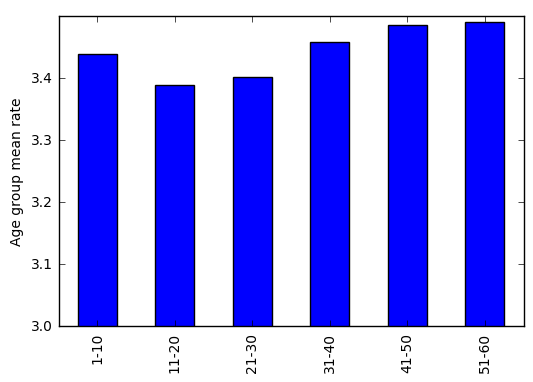

In [24]:
#means of ratings of different age group
ax = df.mean().plot.bar(ylim=3.0)
ax.set_ylabel('Age group mean rate')
print('Age grounp with highest mean rating:',df.mean().idxmax(),'Mean of rating:',df.mean().max())

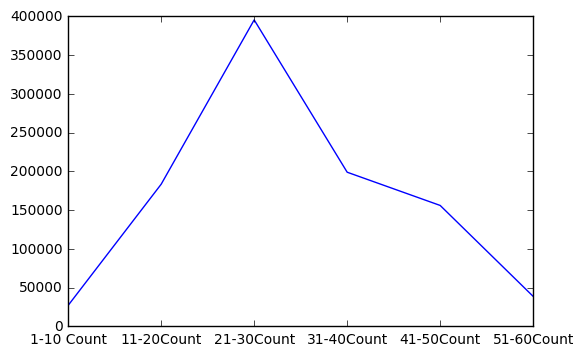

In [75]:
df_count.sum(0).plot()

Male age grounp with highest mean rating: 41-50 Mean of rating: 3.47598246444


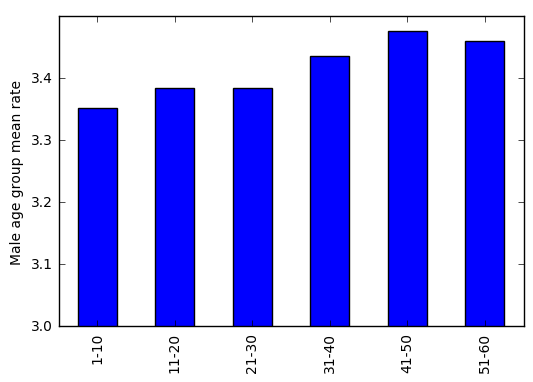

In [23]:
#means of ratings of different male age group
ax = male_df.mean().plot.bar(ylim=3.0)
ax.set_ylabel('Male age group mean rate')
print('Male age grounp with highest mean rating:',male_df.mean().idxmax(),'Mean of rating:',male_df.mean().max())

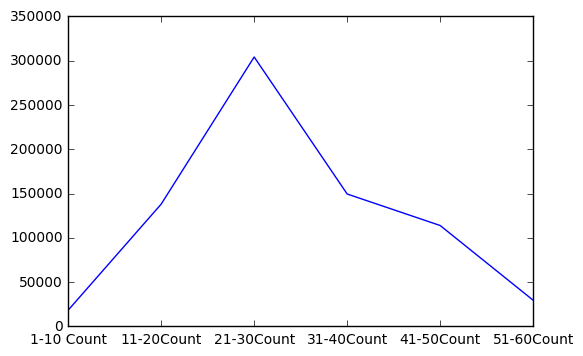

In [76]:
male_df_count.sum(0).plot()

Female age grounp with highest mean rating: 51-60 Mean of rating: 3.61554376117


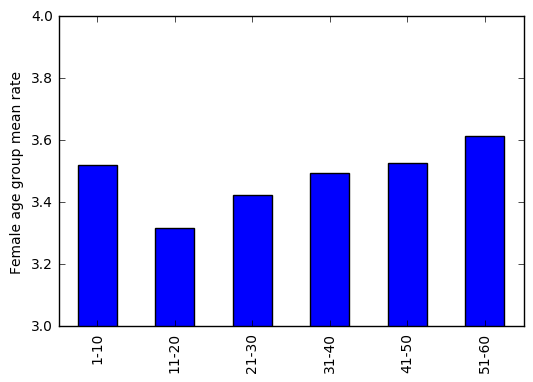

In [22]:
#means of ratings of different female age group
ax = female_df.mean().plot.bar(ylim=3.0)
ax.set_ylabel('Female age group mean rate')
print('Female age grounp with highest mean rating:',female_df.mean().idxmax(),'Mean of rating:',female_df.mean().max())

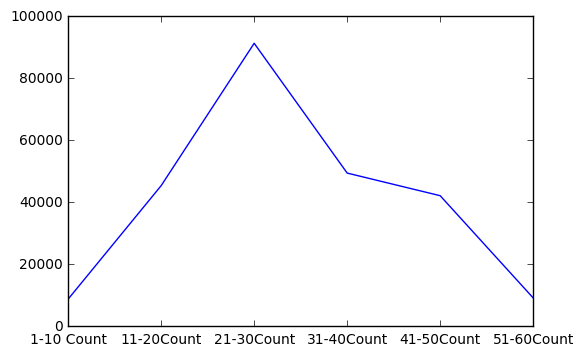

In [78]:
female_df_count.sum(0).plot()

Occupation number with highest mean rating: 4 Mean of rating: 131032


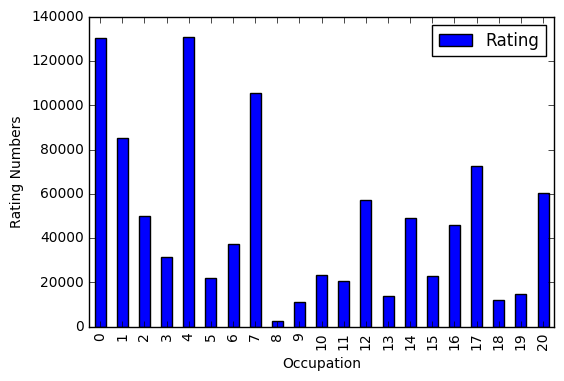

In [52]:
#means of ratings of different occupation group
occup_df = pd.DataFrame({})
occup_df = pd.concat([occup_df, data.groupby('Occupation')['Rating'].size()], join='outer', axis=1)
occup_df.columns=['Rating']
print('Occupation number with highest mean rating:',occup_df['Rating'].idxmax(),'Mean of rating:',occup_df['Rating'].max())
ax = occup_df.plot.bar()
ax.set_ylabel('Rating Numbers')

Occupation number with highest mean rating: 13 Mean of rating: 3.78173622219


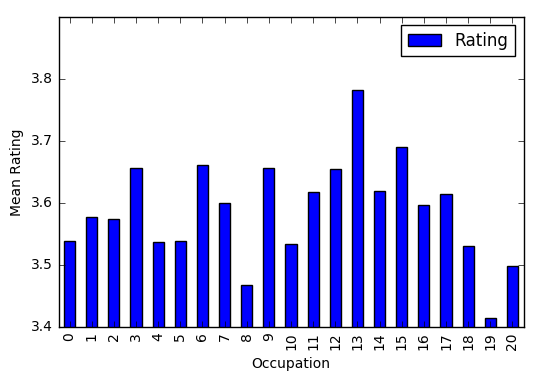

In [53]:
#means of ratings of different occupation group
occup_df = pd.DataFrame({})
occup_df = pd.concat([occup_df, data.groupby('Occupation')['Rating'].mean()], join='outer', axis=1)
occup_df.columns=['Rating']
print('Occupation number with highest mean rating:',occup_df['Rating'].idxmax(),'Mean of rating:',occup_df['Rating'].max())
ax = occup_df.plot.bar(ylim=(3.4,3.9))
ax.set_ylabel('Mean Rating')


# In different settings , people who are easy to please can be different
According to our data, we can divided into some catagories
- Age : People who are relatively old are easy to please
   - All   :51-60
   - Women :51-60
   - Men   :41-50
- Occupation
   - Retired people tends to give higher ratings
- Film genres
   - Film-Noir Film are favored

### Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

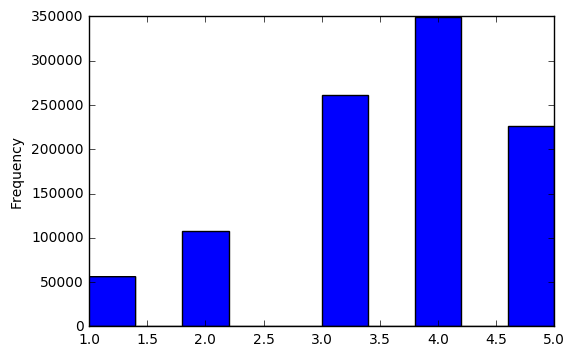

In [81]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
#Plot a histogram of the ratings of all movies.

plt.hist(data.Rating)
plt.xlabel('Rate')
plt.ylabel('Number of ratings')

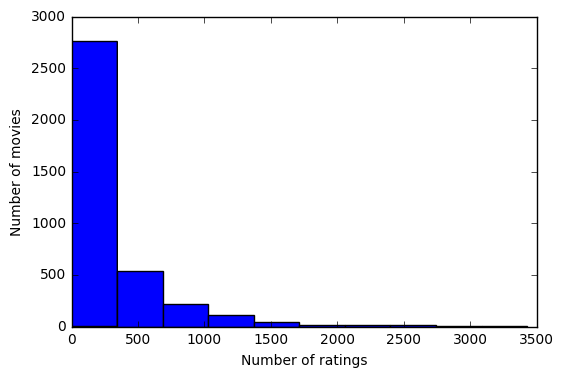

In [82]:
#Plot a histogram of the number of ratings each movie recieved.
rate_by_title = data.groupby('Title').size()
plt.hist(rate_by_title)
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')

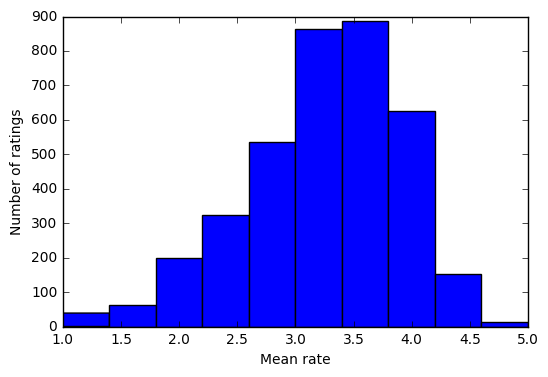

In [83]:
#Plot a histogram of the average rating for each movie.
grouped = data.groupby('Title')
mean_rate = grouped['Rating'].aggregate(np.mean)
plt.hist(mean_rate)
plt.xlabel('Mean rate')
plt.ylabel('Number of ratings')

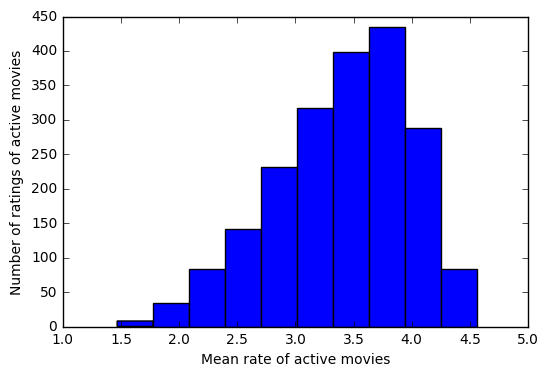

In [84]:
#Plot a histogram of the average rating for movies which are rated more than 100 times.
active_titles = rate_by_title.index[rate_by_title >= 100]
mean_active_rate = mean_rate.ix[active_titles]
plt.hist(mean_active_rate)
plt.xlabel('Mean rate of active movies')
plt.ylabel('Number of ratings of active movies')

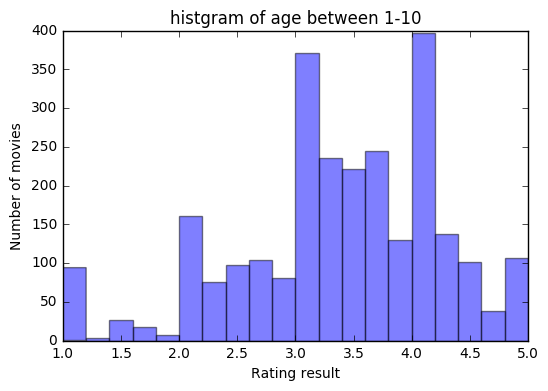

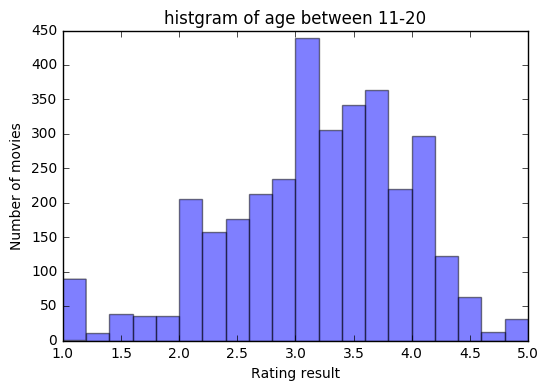

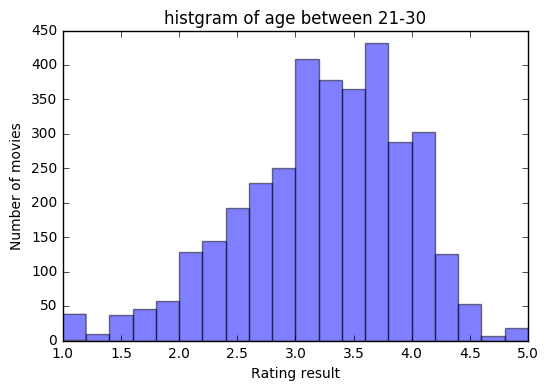

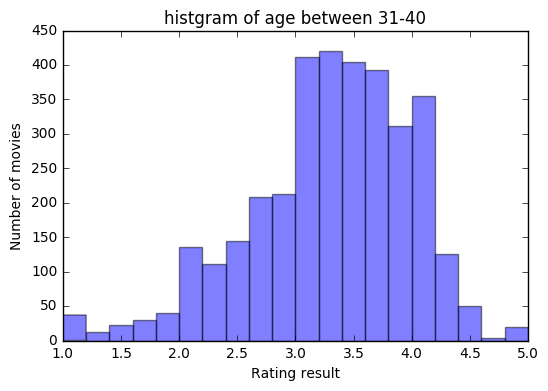

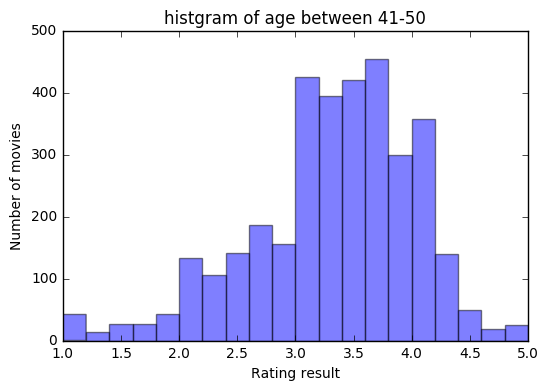

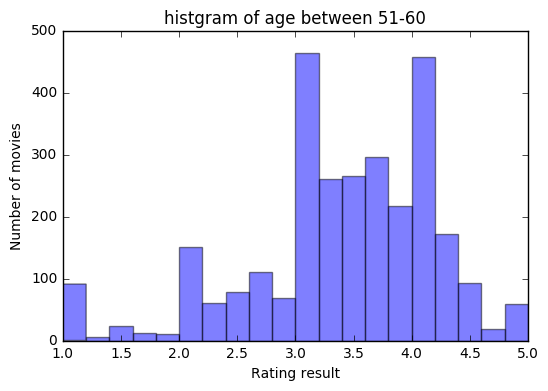

In [155]:
age = [n for n in range(1,61)]
age = [age[i:i+10] for i in range(0,60,10)]
df = pd.DataFrame({'A' : []})
for x in age:
    temp = data.loc[data['Age'].isin(x)]
    temp = temp.groupby('Title')['Rating'].aggregate(np.mean)
    try:
        temp.plot.hist(20, alpha=0.5)
        plt.xlabel('Rating result')
        plt.ylabel('Number of movies')
        plt.title('histgram of age between '+str(x[0])+'-'+str(x[-1]))
        plt.show()
    except:
        pass


In [195]:
for x in age:
    temp = data.loc[data['Age'].isin(x)]
    print('Users number in age between '+str(x[0])+'-'+str(x[-1]),temp.groupby('UserID').size().index.size)
    print('rating below 2 numbers:',temp[temp['Rating']<2].size)
    print('rating above 4 numbers:',temp[temp['Rating']>4].size)
    print('Total rating numbers:',temp.size)
    print((temp[temp['Rating']<2].size+temp[temp['Rating']>4].size)/temp.size)
    print('==========')

Users number in age between 1-10 222
rating below 2 numbers: 24618
rating above 4 numbers: 74822
Total rating numbers: 299321
0.332218588071
Users number in age between 11-20 1103
rating below 2 numbers: 143693
rating above 4 numbers: 446138
Total rating numbers: 2018896
0.292155217505
Users number in age between 21-30 2096
rating below 2 numbers: 262878
rating above 4 numbers: 943030
Total rating numbers: 4351116
0.277149126799
Users number in age between 31-40 1193
rating below 2 numbers: 99737
rating above 4 numbers: 491810
Total rating numbers: 2189033
0.270232107054
Users number in age between 41-50 1046
rating below 2 numbers: 69927
rating above 4 numbers: 415162
Total rating numbers: 1717353
0.282463186078
Users number in age between 51-60 380
rating below 2 numbers: 17061
rating above 4 numbers: 118448
Total rating numbers: 426580
0.317663744198


Title
$1,000,000 Duck (1971)                            3.800000
'Night Mother (1986)                              2.615385
'Til There Was You (1997)                         2.666667
'burbs, The (1989)                                2.580645
...And Justice for All (1979)                     3.606061
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.337079
101 Dalmatians (1961)                             3.546667
101 Dalmatians (1996)                             3.050847
12 Angry Men (1957)                               4.318841
13th Warrior, The (1999)                          3.038462
187 (1997)                                        2.272727
2 Days in the Valley (1996)                       3.369565
20 Dates (1998)                                   2.583333
20,000 Leagues Under the Sea (1954)               3.562500
200 Cigarettes (1999)                             2.652174
2001: A Space Odyssey (1968)                      

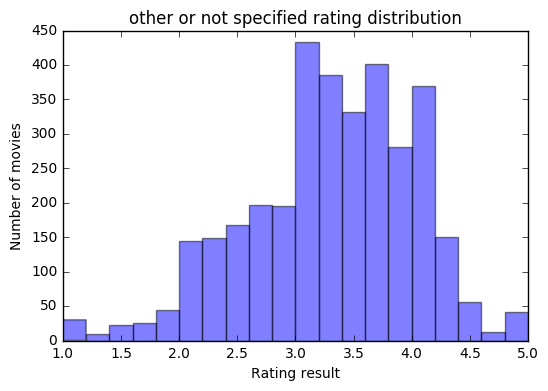

Title
$1,000,000 Duck (1971)                            2.166667
'Night Mother (1986)                              3.714286
'Til There Was You (1997)                         2.666667
'burbs, The (1989)                                2.958333
...And Justice for All (1979)                     3.650000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.463415
101 Dalmatians (1961)                             3.627451
101 Dalmatians (1996)                             3.117647
12 Angry Men (1957)                               4.148148
13th Warrior, The (1999)                          3.055556
187 (1997)                                        2.250000
2 Days in the Valley (1996)                       3.285714
20 Dates (1998)                                   2.444444
20,000 Leagues Under the Sea (1954)               3.800000
200 Cigarettes (1999)                             2.916667
2001: A Space Odyssey (1968)                      

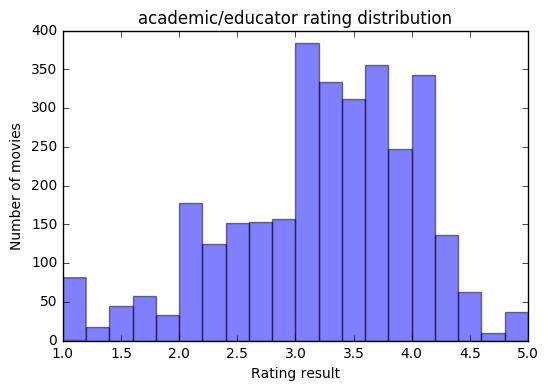

Title
$1,000,000 Duck (1971)                                 NaN
'Night Mother (1986)                              3.000000
'Til There Was You (1997)                         2.500000
'burbs, The (1989)                                2.950000
...And Justice for All (1979)                     3.833333
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.285714
101 Dalmatians (1961)                             3.625000
101 Dalmatians (1996)                             2.944444
12 Angry Men (1957)                               4.333333
13th Warrior, The (1999)                          3.483871
187 (1997)                                        2.000000
2 Days in the Valley (1996)                       3.157895
20 Dates (1998)                                   3.428571
20,000 Leagues Under the Sea (1954)               3.857143
200 Cigarettes (1999)                             3.090909
2001: A Space Odyssey (1968)                      

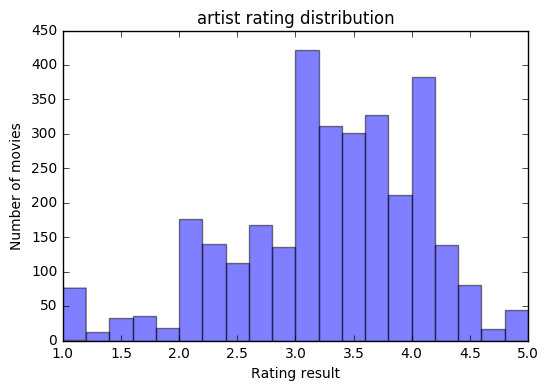

Title
$1,000,000 Duck (1971)                            4.000000
'Night Mother (1986)                              3.400000
'Til There Was You (1997)                         2.200000
'burbs, The (1989)                                2.833333
...And Justice for All (1979)                     2.875000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.478261
101 Dalmatians (1961)                             3.736842
101 Dalmatians (1996)                             3.166667
12 Angry Men (1957)                               4.400000
13th Warrior, The (1999)                          2.764706
187 (1997)                                        4.000000
2 Days in the Valley (1996)                       3.363636
20 Dates (1998)                                   3.000000
20,000 Leagues Under the Sea (1954)               3.875000
200 Cigarettes (1999)                             2.769231
2001: A Space Odyssey (1968)                      

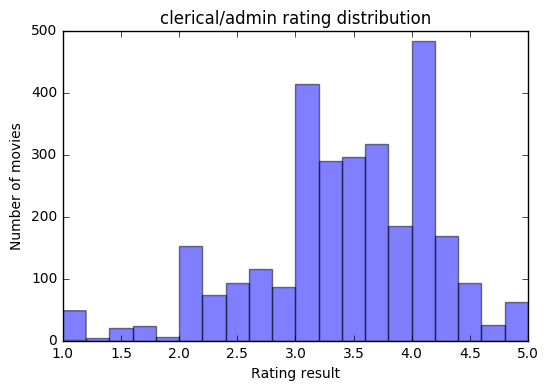

Title
$1,000,000 Duck (1971)                            2.800000
'Night Mother (1986)                              3.666667
'Til There Was You (1997)                         3.333333
'burbs, The (1989)                                3.022222
...And Justice for All (1979)                     3.444444
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.391026
101 Dalmatians (1961)                             3.423529
101 Dalmatians (1996)                             2.595238
12 Angry Men (1957)                               4.115385
13th Warrior, The (1999)                          3.016949
187 (1997)                                        2.181818
2 Days in the Valley (1996)                       3.314286
20 Dates (1998)                                   3.043478
20,000 Leagues Under the Sea (1954)               3.652174
200 Cigarettes (1999)                             2.718750
2001: A Space Odyssey (1968)                      

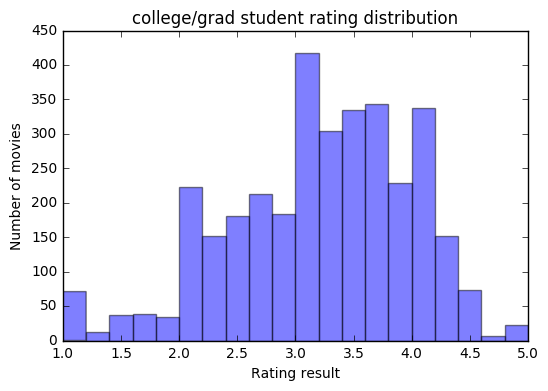

Title
$1,000,000 Duck (1971)                            4.000000
'Night Mother (1986)                              3.750000
'Til There Was You (1997)                              NaN
'burbs, The (1989)                                2.916667
...And Justice for All (1979)                     3.750000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.769231
101 Dalmatians (1961)                             3.666667
101 Dalmatians (1996)                             3.333333
12 Angry Men (1957)                               4.400000
13th Warrior, The (1999)                          3.300000
187 (1997)                                             NaN
2 Days in the Valley (1996)                       2.000000
20 Dates (1998)                                   1.000000
20,000 Leagues Under the Sea (1954)               3.600000
200 Cigarettes (1999)                             3.000000
2001: A Space Odyssey (1968)                      

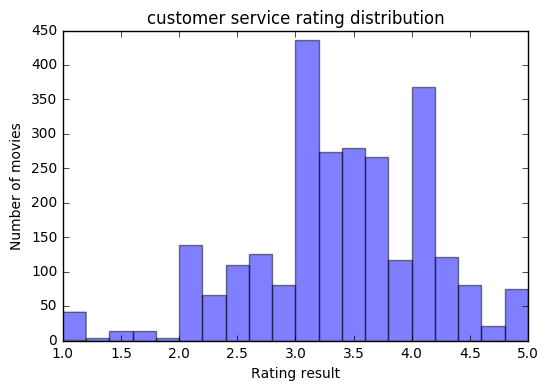

Title
$1,000,000 Duck (1971)                            3.000000
'Night Mother (1986)                              3.500000
'Til There Was You (1997)                         2.000000
'burbs, The (1989)                                2.625000
...And Justice for All (1979)                     3.888889
1-900 (1994)                                      3.000000
10 Things I Hate About You (1999)                 3.428571
101 Dalmatians (1961)                             3.736842
101 Dalmatians (1996)                             3.437500
12 Angry Men (1957)                               4.516129
13th Warrior, The (1999)                          3.000000
187 (1997)                                        3.000000
2 Days in the Valley (1996)                       3.375000
20 Dates (1998)                                   3.000000
20,000 Leagues Under the Sea (1954)               3.758621
200 Cigarettes (1999)                             3.142857
2001: A Space Odyssey (1968)                      

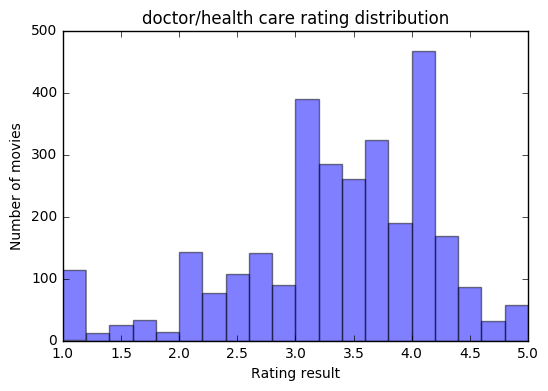

Title
$1,000,000 Duck (1971)                            3.000000
'Night Mother (1986)                              3.545455
'Til There Was You (1997)                         2.857143
'burbs, The (1989)                                2.615385
...And Justice for All (1979)                     3.848485
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.558140
101 Dalmatians (1961)                             3.716981
101 Dalmatians (1996)                             3.190476
12 Angry Men (1957)                               4.230769
13th Warrior, The (1999)                          3.430769
187 (1997)                                        3.166667
2 Days in the Valley (1996)                       3.413793
20 Dates (1998)                                   3.153846
20,000 Leagues Under the Sea (1954)               3.714286
200 Cigarettes (1999)                             2.777778
2001: A Space Odyssey (1968)                      

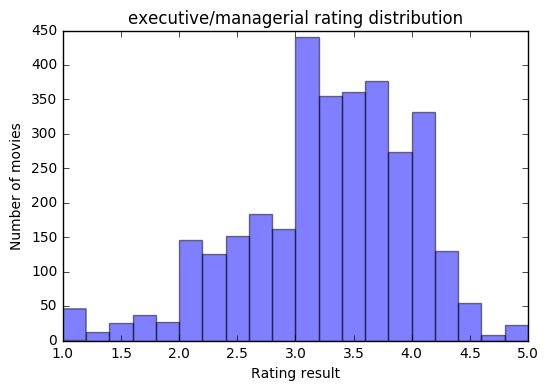

Title
$1,000,000 Duck (1971)                                 NaN
'Night Mother (1986)                                   NaN
'Til There Was You (1997)                              NaN
'burbs, The (1989)                                5.000000
...And Justice for All (1979)                          NaN
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 4.000000
101 Dalmatians (1961)                             4.000000
101 Dalmatians (1996)                             3.000000
12 Angry Men (1957)                               5.000000
13th Warrior, The (1999)                          3.000000
187 (1997)                                             NaN
2 Days in the Valley (1996)                       4.000000
20 Dates (1998)                                   3.000000
20,000 Leagues Under the Sea (1954)               3.333333
200 Cigarettes (1999)                                  NaN
2001: A Space Odyssey (1968)                      

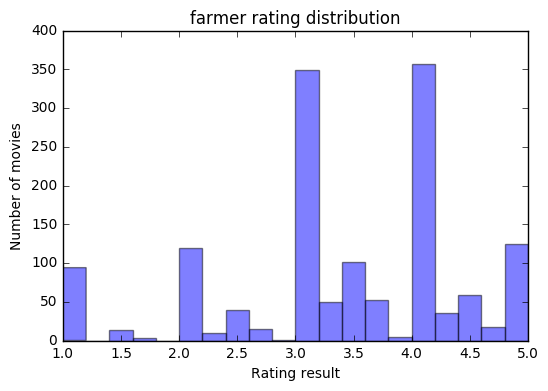

Title
$1,000,000 Duck (1971)                            3.666667
'Night Mother (1986)                                   NaN
'Til There Was You (1997)                              NaN
'burbs, The (1989)                                2.800000
...And Justice for All (1979)                     3.500000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.916667
101 Dalmatians (1961)                             3.916667
101 Dalmatians (1996)                             2.909091
12 Angry Men (1957)                               4.400000
13th Warrior, The (1999)                          3.666667
187 (1997)                                             NaN
2 Days in the Valley (1996)                       3.500000
20 Dates (1998)                                        NaN
20,000 Leagues Under the Sea (1954)               3.400000
200 Cigarettes (1999)                             4.000000
2001: A Space Odyssey (1968)                      

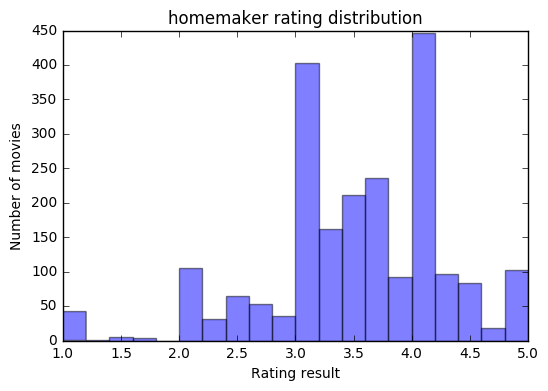

Title
$1,000,000 Duck (1971)                                 NaN
'Night Mother (1986)                              1.000000
'Til There Was You (1997)                         3.500000
'burbs, The (1989)                                5.000000
...And Justice for All (1979)                     3.000000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.865385
101 Dalmatians (1961)                             3.483871
101 Dalmatians (1996)                             2.903226
12 Angry Men (1957)                               3.937500
13th Warrior, The (1999)                          3.045455
187 (1997)                                        3.333333
2 Days in the Valley (1996)                       4.000000
20 Dates (1998)                                   3.000000
20,000 Leagues Under the Sea (1954)               3.272727
200 Cigarettes (1999)                             2.428571
2001: A Space Odyssey (1968)                      

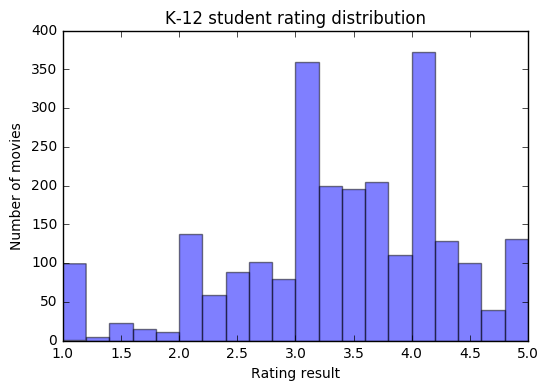

Title
$1,000,000 Duck (1971)                                 NaN
'Night Mother (1986)                              5.000000
'Til There Was You (1997)                         4.000000
'burbs, The (1989)                                2.000000
...And Justice for All (1979)                     3.833333
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.200000
101 Dalmatians (1961)                             4.444444
101 Dalmatians (1996)                             3.200000
12 Angry Men (1957)                               4.409091
13th Warrior, The (1999)                          3.300000
187 (1997)                                        3.000000
2 Days in the Valley (1996)                       3.000000
20 Dates (1998)                                   3.285714
20,000 Leagues Under the Sea (1954)               4.000000
200 Cigarettes (1999)                             3.000000
2001: A Space Odyssey (1968)                      

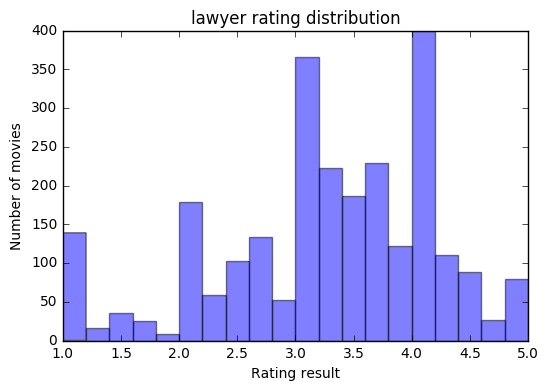

Title
$1,000,000 Duck (1971)                            1.000000
'Night Mother (1986)                                   NaN
'Til There Was You (1997)                         3.000000
'burbs, The (1989)                                2.933333
...And Justice for All (1979)                     3.500000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.250000
101 Dalmatians (1961)                             3.454545
101 Dalmatians (1996)                             2.916667
12 Angry Men (1957)                               4.380952
13th Warrior, The (1999)                          3.283019
187 (1997)                                        4.000000
2 Days in the Valley (1996)                       3.562500
20 Dates (1998)                                   2.600000
20,000 Leagues Under the Sea (1954)               3.666667
200 Cigarettes (1999)                             2.400000
2001: A Space Odyssey (1968)                      

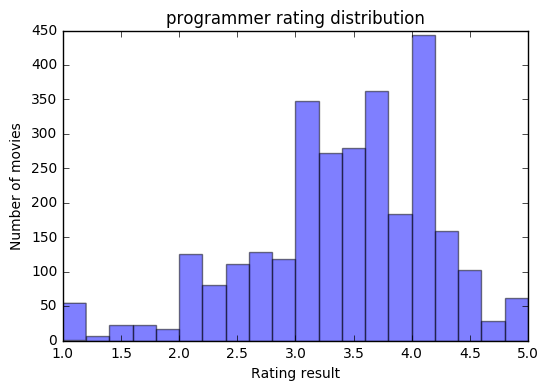

Title
$1,000,000 Duck (1971)                            2.000000
'Night Mother (1986)                              4.666667
'Til There Was You (1997)                         4.000000
'burbs, The (1989)                                     NaN
...And Justice for All (1979)                     4.000000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 4.000000
101 Dalmatians (1961)                             3.142857
101 Dalmatians (1996)                             3.666667
12 Angry Men (1957)                               4.368421
13th Warrior, The (1999)                          3.428571
187 (1997)                                        3.000000
2 Days in the Valley (1996)                       3.600000
20 Dates (1998)                                   3.500000
20,000 Leagues Under the Sea (1954)               3.857143
200 Cigarettes (1999)                             4.000000
2001: A Space Odyssey (1968)                      

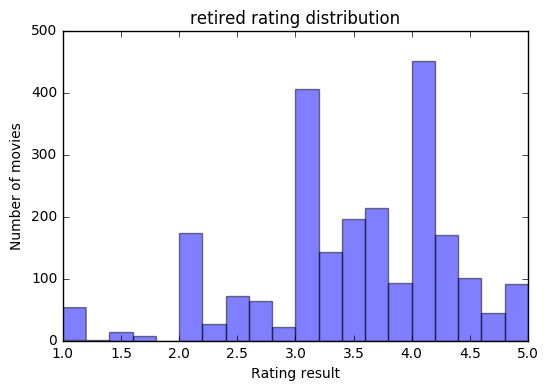

Title
$1,000,000 Duck (1971)                                 NaN
'Night Mother (1986)                              3.500000
'Til There Was You (1997)                         2.600000
'burbs, The (1989)                                3.250000
...And Justice for All (1979)                     3.538462
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.388889
101 Dalmatians (1961)                             3.478261
101 Dalmatians (1996)                             3.071429
12 Angry Men (1957)                               4.333333
13th Warrior, The (1999)                          3.093023
187 (1997)                                        5.000000
2 Days in the Valley (1996)                       3.117647
20 Dates (1998)                                   2.666667
20,000 Leagues Under the Sea (1954)               3.857143
200 Cigarettes (1999)                             2.888889
2001: A Space Odyssey (1968)                      

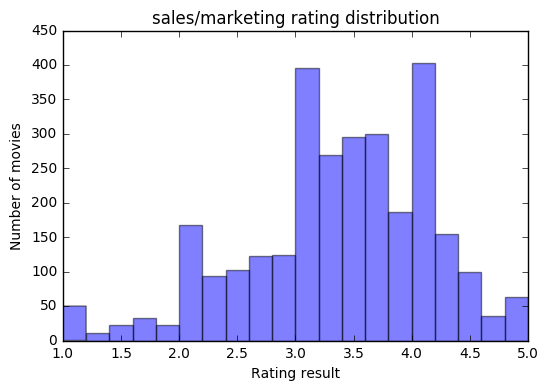

Title
$1,000,000 Duck (1971)                                 NaN
'Night Mother (1986)                              3.500000
'Til There Was You (1997)                              NaN
'burbs, The (1989)                                3.200000
...And Justice for All (1979)                     4.000000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.076923
101 Dalmatians (1961)                             4.111111
101 Dalmatians (1996)                             4.000000
12 Angry Men (1957)                               4.571429
13th Warrior, The (1999)                          3.333333
187 (1997)                                             NaN
2 Days in the Valley (1996)                       3.000000
20 Dates (1998)                                   2.000000
20,000 Leagues Under the Sea (1954)               3.733333
200 Cigarettes (1999)                             3.000000
2001: A Space Odyssey (1968)                      

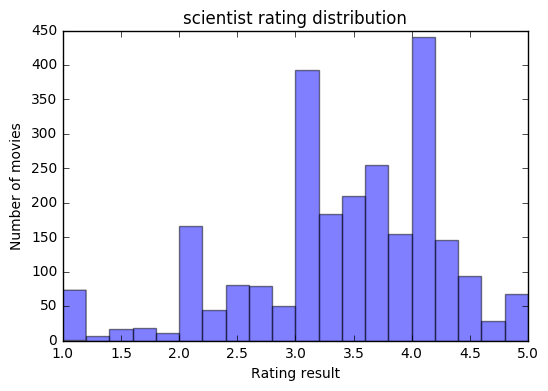

Title
$1,000,000 Duck (1971)                            5.000000
'Night Mother (1986)                              3.000000
'Til There Was You (1997)                         1.500000
'burbs, The (1989)                                2.833333
...And Justice for All (1979)                     4.000000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.375000
101 Dalmatians (1961)                             3.521739
101 Dalmatians (1996)                             3.375000
12 Angry Men (1957)                               4.366667
13th Warrior, The (1999)                          3.117647
187 (1997)                                        3.500000
2 Days in the Valley (1996)                       3.176471
20 Dates (1998)                                   3.000000
20,000 Leagues Under the Sea (1954)               3.833333
200 Cigarettes (1999)                             3.200000
2001: A Space Odyssey (1968)                      

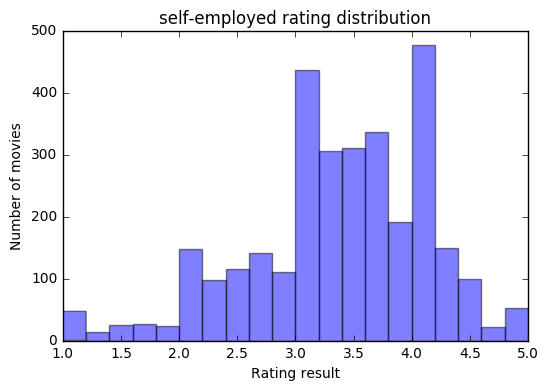

Title
$1,000,000 Duck (1971)                            3.500000
'Night Mother (1986)                              2.500000
'Til There Was You (1997)                         4.000000
'burbs, The (1989)                                3.000000
...And Justice for All (1979)                     4.090909
1-900 (1994)                                      2.000000
10 Things I Hate About You (1999)                 3.510638
101 Dalmatians (1961)                             3.641026
101 Dalmatians (1996)                             3.352941
12 Angry Men (1957)                               4.333333
13th Warrior, The (1999)                          3.360000
187 (1997)                                        2.800000
2 Days in the Valley (1996)                       3.375000
20 Dates (1998)                                   3.333333
20,000 Leagues Under the Sea (1954)               3.716981
200 Cigarettes (1999)                             3.600000
2001: A Space Odyssey (1968)                      

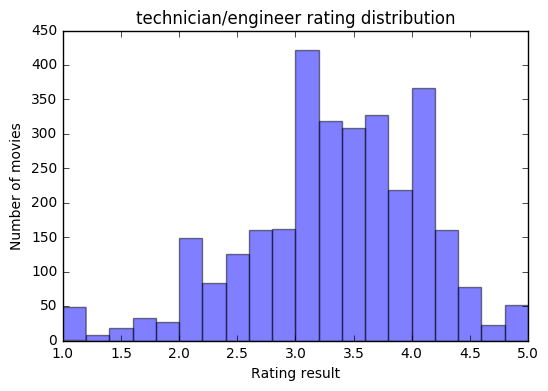

Title
$1,000,000 Duck (1971)                                 NaN
'Night Mother (1986)                              4.500000
'Til There Was You (1997)                         1.000000
'burbs, The (1989)                                3.100000
...And Justice for All (1979)                     3.750000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.571429
101 Dalmatians (1961)                             3.625000
101 Dalmatians (1996)                             3.400000
12 Angry Men (1957)                               4.625000
13th Warrior, The (1999)                          3.117647
187 (1997)                                        3.333333
2 Days in the Valley (1996)                       3.714286
20 Dates (1998)                                   3.000000
20,000 Leagues Under the Sea (1954)               3.714286
200 Cigarettes (1999)                             2.000000
2001: A Space Odyssey (1968)                      

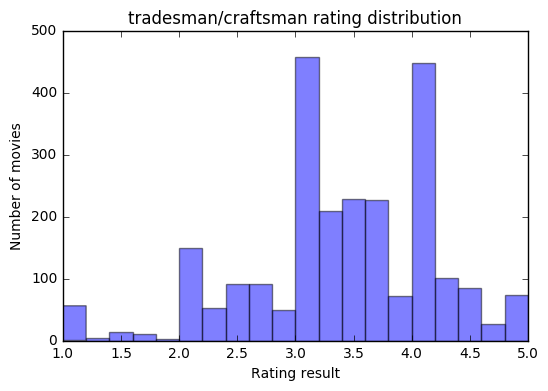

Title
$1,000,000 Duck (1971)                            3.500000
'Night Mother (1986)                                   NaN
'Til There Was You (1997)                         2.000000
'burbs, The (1989)                                3.400000
...And Justice for All (1979)                     4.000000
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.090909
101 Dalmatians (1961)                             2.857143
101 Dalmatians (1996)                             3.200000
12 Angry Men (1957)                               4.428571
13th Warrior, The (1999)                          2.866667
187 (1997)                                        3.000000
2 Days in the Valley (1996)                       2.500000
20 Dates (1998)                                   2.000000
20,000 Leagues Under the Sea (1954)               3.000000
200 Cigarettes (1999)                             3.000000
2001: A Space Odyssey (1968)                      

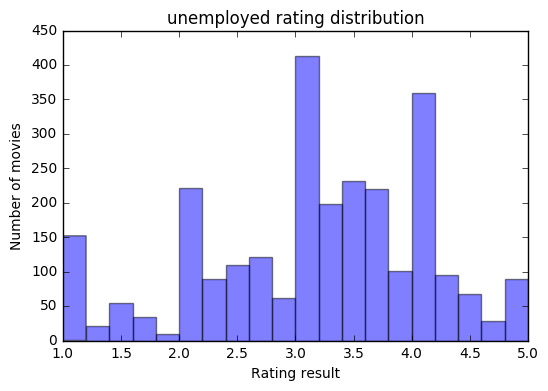

Title
$1,000,000 Duck (1971)                            2.333333
'Night Mother (1986)                              3.000000
'Til There Was You (1997)                         2.333333
'burbs, The (1989)                                3.000000
...And Justice for All (1979)                     3.714286
1-900 (1994)                                           NaN
10 Things I Hate About You (1999)                 3.052632
101 Dalmatians (1961)                             3.709677
101 Dalmatians (1996)                             2.571429
12 Angry Men (1957)                               4.230769
13th Warrior, The (1999)                          3.032258
187 (1997)                                        3.000000
2 Days in the Valley (1996)                       2.952381
20 Dates (1998)                                   2.272727
20,000 Leagues Under the Sea (1954)               3.741935
200 Cigarettes (1999)                             3.166667
2001: A Space Odyssey (1968)                      

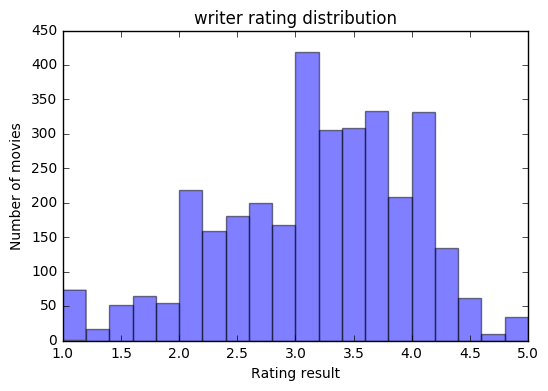

In [90]:
list_Occ = pd.read_csv('Occupation.csv',header=None, encoding = "ISO-8859-1",engine='python')
Gr_Occ_Rating = data.pivot_table('Rating', index='Title', columns='Occupation')
for i in Gr_Occ_Rating.columns:
    print(Gr_Occ_Rating[i])
    Gr_Occ_Rating[i].plot.hist(20, alpha=0.5)
    plt.xlabel('Rating result')
    plt.ylabel('Number of movies')
    plt.title(list_Occ.loc[i,1]+" rating distribution")
    plt.show()

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

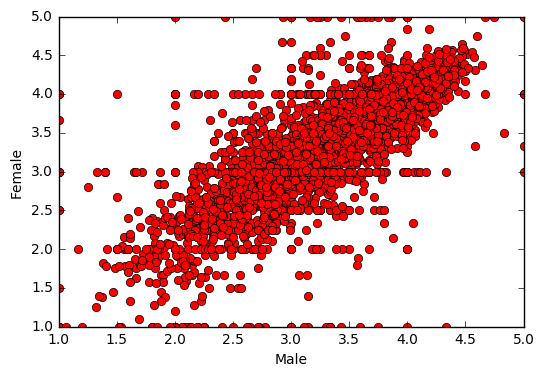

In [150]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
#Make a scatter plot of men versus women and their mean rating for every movie.
import matplotlib.pyplot as plt
#Make a scatter plot of men versus women and their mean rating for every movie.
mean_ratings = data.pivot_table('Rating',index='MovieID',columns='Gender', aggfunc='mean')
#ax = mean_ratings['F'].plot(style = '.', x=mean_ratings['F'].index, y=mean_ratings['F'].values,color='DarkBlue', label='Group 1')
#mean_ratings['M'].plot(style = '.', x=mean_ratings['M'].index, y=mean_ratings['M'].values,color='DarkGreen', label='Group 2', ax=ax)
tm = list(mean_ratings['M'].values) 
tf = list(mean_ratings['F'].values)
plt.xlabel('Male')
plt.ylabel('Female')
plt.plot(tm, tf,'ro')

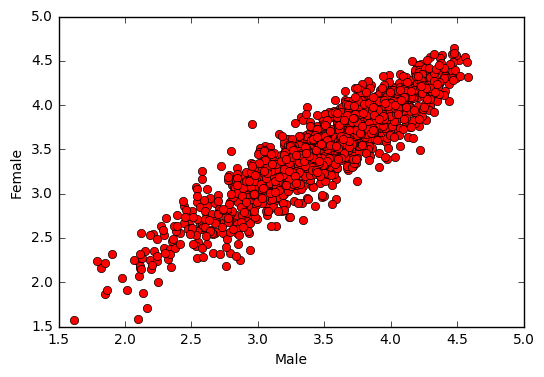

In [151]:
ratings_by_title = data.groupby('MovieID').size()
active_titles = ratings_by_title.index[ratings_by_title >= 200]
sub_mean_ratings = mean_ratings.ix[active_titles]
#sub_ax = sub_mean_ratings['F'].plot(style = '.', x=sub_mean_ratings['F'].index, y=sub_mean_ratings['F'].values,color='DarkBlue', label='Group 1')
#sub_mean_ratings['M'].plot(style = '.', x=sub_mean_ratings['M'].index, y=sub_mean_ratings['M'].values,color='DarkGreen', label='Group 2', ax=sub_ax)
sub_tm = list(sub_mean_ratings['M'].values) 
sub_tf = list(sub_mean_ratings['F'].values) 
plt.xlabel('Male')
plt.ylabel('Female')
plt.plot(sub_tm, sub_tf,'ro')

In [152]:
#Compute the correlation coefficent between the ratings of men and women
print ('Correlation for all men and women: \n',mean_ratings.corr())
print ('\nCorrelation for men and women whose rating more than 200 times: \n',sub_mean_ratings.corr())

Correlation for all men and women: 
 Gender        F        M
Gender                  
F       1.00000  0.76319
M       0.76319  1.00000

Correlation for men and women whose rating more than 200 times: 
 Gender         F         M
Gender                    
F       1.000000  0.918963
M       0.918963  1.000000


the rating time for the moive would better be more than 117


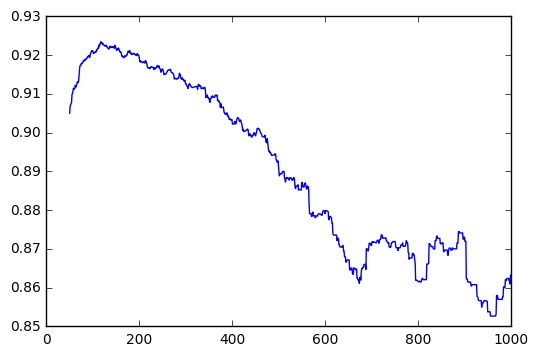

In [153]:
#Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
import matplotlib.pylab as pl
from scipy.stats.stats import pearsonr
import pandas as pd
%matplotlib inline

data = pd.read_hdf('data.h5')
mean_ratings = data.pivot_table('Rating',index='MovieID',columns='Gender', aggfunc='mean')
ratings_by_title = data.groupby('MovieID').size()
list_cor=[]
for i in range(50,1000):                     #find the rating time to make correlation coefficient closest to 1
    active_titles = ratings_by_title.index[ratings_by_title>=i]
    sub_mean_ratings = mean_ratings.ix[active_titles]
    sub_tm = list(sub_mean_ratings['M'].values)
    sub_tf = list(sub_mean_ratings['F'].values)
    cor = pearsonr(sub_tm,sub_tf)[0]
    list_cor.append(cor)
pl.plot(range(50,1000),list_cor)
m=list_cor.index(max(list_cor))+50
print("the rating time for the moive would better be more than",m)

training set: 1898
the model: y=0.918012*x+ 0.299048
It will be more rational if the rating time is more than 117 and the rating score is around 3.65


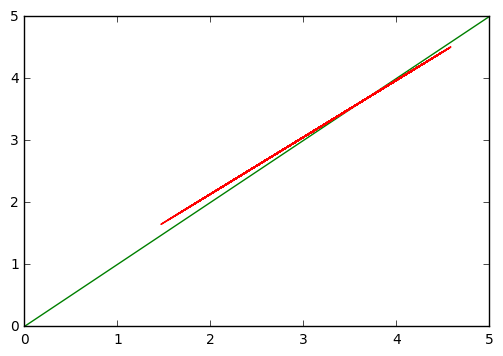

In [154]:
data = pd.read_hdf('data.h5')
mean_ratings = data.pivot_table('Rating',index='MovieID',columns='Gender', aggfunc='mean')
ratings_by_title = data.groupby('MovieID').size()
list_cor=[]
y=[]
for i in range(50,1000):                    #find the rating time to make correlation coefficient closest to 1
    active_titles = ratings_by_title.index[ratings_by_title>=i]
    sub_mean_ratings = mean_ratings.ix[active_titles]
    sub_tm = list(sub_mean_ratings['M'].values)
    sub_tf = list(sub_mean_ratings['F'].values)
    cor = pearsonr(sub_tm,sub_tf)[0]
    list_cor.append(cor)
m=list_cor.index(max(list_cor))+50          #set the rating time
active_titles = ratings_by_title.index[ratings_by_title>=m]
sub_mean_ratings = mean_ratings.ix[active_titles]
sub_tm = list(sub_mean_ratings['M'].values)
sub_tf = list(sub_mean_ratings['F'].values)
n=len(sub_tm)
xy=x2=0
for i in range(n):             #least square method
    xy+=sub_tm[i]*sub_tf[i]
    x2+=sub_tm[i]*sub_tm[i]
a=(n*xy-sum(sub_tf)*sum(sub_tm))/(n*x2-sum(sub_tm)*sum(sub_tm))
b=sum(sub_tf)/n-a*(sum(sub_tm)/n)
for i in sub_tm:
    temp=a*i+b
    y.append(temp)
pl.plot(range(0,6),range(0,6),'g')     #get the intersection
pl.plot(sub_tm,y,'r')
print("training set:",n)
print("the model:","y=%f*x+"%a,"%f"%b)
print("It will be more rational if the rating time is more than %d"%m,"and the rating score is around 3.65")

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

In [ ]:
#Generate randome sample index.
import numpy
import random
import itertools
column = ['UserID','MovieID','Rating','Timestamp']
rate = pd.read_csv('ratings.dat',sep='::',header=None, names=column,engine='python')
group = rate.groupby('UserID').size()


store_rat = []
pre = 0
for i in range(1,len(group)+1):
    a = random.sample(range(group[i]),10)
    ay = numpy.array(a)
    ay = ay + pre
    store_rat.append(ay)
    pre = pre + group[i]
train_idx = list(itertools.chain.from_iterable(store_rat))
train_idx.sort()
len(train_idx)
test_idx = list(set(range(len(rate))) - set(train_idx))
len(test_idx)

rate_train = rate.drop(rate.index[train_idx])
rate_test = rate.drop(rate.index[test_idx])
print (len(rate_test))
print (len(rate_train))
np.savetxt(r'train.dat', rate_train.values, fmt='%d')
np.savetxt(r'test.dat', rate_test.values, fmt='%d')

In [7]:
# We first divide the data into test and train data according to the 
# Movielens website instruction
# Run some recommendation experiments using MovieLens 1M
import scipy.sparse
import numpy
data_shape = (6040, 3952)
df = pd.read_csv("train.dat", sep=" ", header=-1)
values = df.values
values[:, 0:2] -= 1
X_train = scipy.sparse.csr_matrix((values[:, 2], (values[:, 0], values[:, 1])), dtype=numpy.float, shape=data_shape)

In [9]:
df = pd.read_csv("test.dat", sep=" ", header=-1)
values = df.values
values[:, 0:2] -= 1
X_test = scipy.sparse.csr_matrix((values[:, 2], (values[:, 0], values[:, 1])), dtype=numpy.float, shape=data_shape)

In [10]:
# Compute means of nonzero elements
X_row_mean = numpy.zeros(data_shape[0])
X_row_sum = numpy.zeros(data_shape[0])

train_rows, train_cols = X_train.nonzero()

In [11]:
print (train_rows, train_cols)
# Iterate through nonzero elements to compute sums and counts of rows elements
for i in range(train_rows.shape[0]):
    X_row_mean[train_rows[i]] += X_train[train_rows[i], train_cols[i]]
    X_row_sum[train_rows[i]] += 1

[   0    0    0 ..., 6039 6039 6039] [   0   47  149 ..., 3734 3750 3818]


In [12]:

X_row_mean /= X_row_sum + (X_row_sum == 0)

# Subtract mean rating for each user
for i in range(train_rows.shape[0]):
    X_train[train_rows[i], train_cols[i]] -= X_row_mean[train_rows[i]]

test_rows, test_cols = X_test.nonzero()
for i in range(test_rows.shape[0]):
    X_test[test_rows[i], test_cols[i]] -= X_row_mean[test_rows[i]]

Se1
Se1.5
Se2.0


In [13]:
print ("test_rows, test_cols")

X_train = numpy.array(X_train.toarray())
X_test = numpy.array(X_test.toarray())

ks = numpy.arange(2, 50)
train_mae = numpy.zeros(ks.shape[0])
test_mae = numpy.zeros(ks.shape[0])
train_scores = X_train[(train_rows, train_cols)]
test_scores = X_test[(test_rows, test_cols)]


test_rows, test_cols


Se3


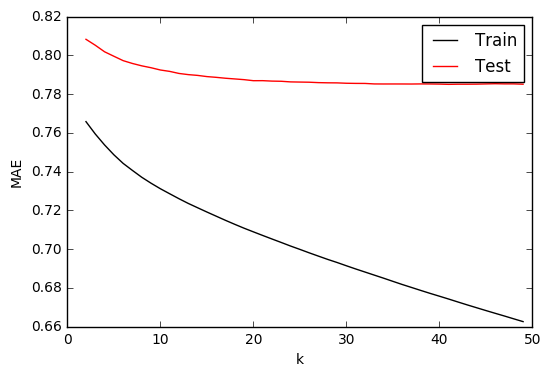

In [15]:
from sklearn.metrics import mean_absolute_error

U, s, Vt = numpy.linalg.svd(X_train, full_matrices=False)

for j, k in enumerate(ks):
    X_pred = U[:, 0:k].dot(numpy.diag(s[0:k])).dot(Vt[0:k, :])

    pred_train_scores = X_pred[(train_rows, train_cols)]
    pred_test_scores = X_pred[(test_rows, test_cols)]

    train_mae[j] = mean_absolute_error(train_scores, pred_train_scores)
    test_mae[j] = mean_absolute_error(test_scores, pred_test_scores)


plt.plot(ks, train_mae, 'k', label="Train")
plt.plot(ks, test_mae, 'r', label="Test")
plt.xlabel("k")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [183]:
# find the SVD prediction that what user may rate the movie he hasnt saw
# find the one with maximum rating
# that's the movie he might want to watch
column = ['MovieID','Title','Genres']
movie = pd.read_csv('movies.dat',sep='::',header=None, names=column,engine='python',encoding='latin_1')
new_rows, new_cols = (X_train==0).nonzero()
recom_movie = {}
user_recom = {}
for n in range(6040):
    movie_name = movie[movie.MovieID==(X_pred[n].argmax()+1)].Title.values[0]
    user_recom[n+1] = X_pred[n].argmax()+1
    print('userid:',n+1,'Recommend Movie:',movie_name)
    if movie_name in recom_movie:
        recom_movie[movie_name] += 1
    else:
        recom_movie[movie_name] = 1

userid: 1 Recommend Movie: Saving Private Ryan (1998)
userid: 2 Recommend Movie: Schindler's List (1993)
userid: 3 Recommend Movie: Star Wars: Episode IV - A New Hope (1977)
userid: 4 Recommend Movie: Jaws (1975)
userid: 5 Recommend Movie: Being John Malkovich (1999)
userid: 6 Recommend Movie: Sound of Music, The (1965)
userid: 7 Recommend Movie: Saving Private Ryan (1998)
userid: 8 Recommend Movie: American Beauty (1999)
userid: 9 Recommend Movie: Shawshank Redemption, The (1994)
userid: 10 Recommend Movie: E.T. the Extra-Terrestrial (1982)
userid: 11 Recommend Movie: Silence of the Lambs, The (1991)
userid: 12 Recommend Movie: Godfather, The (1972)
userid: 13 Recommend Movie: Star Wars: Episode IV - A New Hope (1977)
userid: 14 Recommend Movie: Sixth Sense, The (1999)
userid: 15 Recommend Movie: Gladiator (2000)
userid: 16 Recommend Movie: Toy Story 2 (1999)
userid: 17 Recommend Movie: Matrix, The (1999)
userid: 18 Recommend Movie: Star Wars: Episode VI - Return of the Jedi (1983)
us

In [74]:
# we have a list for the recommend movie
pd.DataFrame.from_dict(recom_movie,orient='index')

,0
Sleepless in Seattle (1993),1
Terminator 2: Judgment Day (1991),73
Unforgiven (1992),1
Die Hard (1988),4
Butch Cassidy and the Sundance Kid (1969),3
Fight Club (1999),26
Indiana Jones and the Last Crusade (1989),1
Schindler's List (1993),190
2001: A Space Odyssey (1968),106
Taxi Driver (1976),1


In [261]:
# combination of the age gender and occupation
# then we can examine the movie we recommend for the users they like or not
age = [n for n in range(1,61)]
age = [age[i:i+10] for i in range(0,60,10)]
res_m = {}
list_Occ = pd.read_csv('Occupation.csv',header=None, encoding = "ISO-8859-1",engine='python')
t_male = data[data.Gender != 'F']
for i in range(20):
    for x in age:
        t_male_data = t_male.loc[t_male['Age'].isin(x)]
        combine = t_male_data.groupby('Genres')['Rating'].mean().sort_values(ascending=False)
        combine = combine.select(lambda x:combine[x]>4)
        for j in combine.index:
            if list_Occ.loc[i,1]+str(x[0])+'-'+str(x[-1]) not in res_m:
                res_m[list_Occ.loc[i,1]+str(x[0])+'-'+str(x[-1])] = [j]
            else:
                res_m[list_Occ.loc[i,1]+str(x[0])+'-'+str(x[-1])].append(j)
                
res_m = pd.DataFrame.from_dict(res_m,orient='index')

In [262]:
res_f = {}
list_Occ = pd.read_csv('Occupation.csv',header=None, encoding = "ISO-8859-1",engine='python')
t_female = data[data.Gender != 'M']
for i in range(20):
    for x in age:
        t_female_data = t_female.loc[t_female['Age'].isin(x)]
        combine = t_female_data.groupby('Genres')['Rating'].mean().sort_values(ascending=False)
        combine = combine.select(lambda x:combine[x]>4)
        for j in combine.index:
            if list_Occ.loc[i,1]+str(x[0])+'-'+str(x[-1]) not in res_f:
                res_f[list_Occ.loc[i,1]+str(x[0])+'-'+str(x[-1])] = [j]
            else:
                res_f[list_Occ.loc[i,1]+str(x[0])+'-'+str(x[-1])].append(j)
                
res_f = pd.DataFrame.from_dict(res_f,orient='index')

In [263]:
res_m

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
executive/managerial1-10,Horror|Mystery,Crime|Film-Noir,Action|Adventure|Animation,Film-Noir|Romance|Thriller,Crime|Drama|Film-Noir|Thriller,Crime|Film-Noir|Mystery,Sci-Fi|War,Film-Noir|Mystery,Animation|Comedy|Thriller,Drama|Fantasy|Romance|Thriller,...,Action|Crime|Romance,Comedy|Crime|Drama,Drama|War,Crime|Drama|Sci-Fi,Crime|Drama,Film-Noir|Thriller,Drama|Mystery,Film-Noir,Film-Noir|Sci-Fi,Crime|Drama|Thriller
other or not specified31-40,Sci-Fi|War,Adventure|Children's|Drama|Musical,Adventure|War,Film-Noir|Mystery,Animation|Comedy|Thriller,Crime|Film-Noir,Film-Noir|Sci-Fi,Film-Noir,Action|Adventure|Animation,Animation,...,Documentary,Adventure|Drama|Western,None,None,None,None,None,None,None,None
farmer11-20,Animation|Comedy|Thriller,Action|Adventure|Drama|Sci-Fi|War,Sci-Fi|War,Drama|Romance|Sci-Fi,Animation,Adventure|War,Film-Noir|Romance|Thriller,Action|Adventure|Animation,Documentary|War,Action|Adventure|Romance|Sci-Fi|War,...,Comedy|Crime|Thriller,Action|Crime|Romance,Crime|Drama,Film-Noir|Mystery|Thriller,Crime|Film-Noir|Thriller,Drama|Mystery|Sci-Fi|Thriller,Children's|Fantasy|Sci-Fi,None,None,None
customer service41-50,Animation,Animation|Comedy|Thriller,Drama|Romance|Sci-Fi,Sci-Fi|War,Action|Adventure|Romance|War,Adventure|Children's|Drama|Musical,Film-Noir|Mystery,Adventure|War,Drama|Mystery|Sci-Fi|Thriller,Film-Noir|Thriller,...,Comedy|Drama|Musical,Action|Drama|War,Drama|Romance|Thriller,Romance|Western,Action|Sci-Fi|Thriller|War,Crime|Film-Noir|Thriller,Comedy|War,None,None,None
K-12 student21-30,Action|Adventure|Drama|Sci-Fi|War,Animation|Comedy|Thriller,Film-Noir|Mystery,Adventure|War,Sci-Fi|War,Film-Noir|Sci-Fi,Crime|Film-Noir|Mystery,Crime|Film-Noir,Animation,Film-Noir,...,None,None,None,None,None,None,None,None,None,None
technician/engineer51-60,Adventure|Children's|Drama|Musical,Action|Adventure|Romance|War,Drama|Romance|Sci-Fi,Sci-Fi|War,Film-Noir|Mystery,Adventure|War,Film-Noir|Romance|Thriller,Crime|Horror|Thriller,Film-Noir|Sci-Fi,Crime|Drama|Film-Noir|Thriller,...,Action|Drama|War,Crime|Film-Noir|Mystery|Thriller,Documentary,Comedy|Mystery|Thriller,Film-Noir,Children's|Drama|Fantasy|Sci-Fi,None,None,None,None
doctor/health care51-60,Adventure|Children's|Drama|Musical,Action|Adventure|Romance|War,Drama|Romance|Sci-Fi,Sci-Fi|War,Film-Noir|Mystery,Adventure|War,Film-Noir|Romance|Thriller,Crime|Horror|Thriller,Film-Noir|Sci-Fi,Crime|Drama|Film-Noir|Thriller,...,Action|Drama|War,Crime|Film-Noir|Mystery|Thriller,Documentary,Comedy|Mystery|Thriller,Film-Noir,Children's|Drama|Fantasy|Sci-Fi,None,None,None,None
other or not specified21-30,Action|Adventure|Drama|Sci-Fi|War,Animation|Comedy|Thriller,Film-Noir|Mystery,Adventure|War,Sci-Fi|War,Film-Noir|Sci-Fi,Crime|Film-Noir|Mystery,Crime|Film-Noir,Animation,Film-Noir,...,None,None,None,None,None,None,None,None,None,None
artist51-60,Adventure|Children's|Drama|Musical,Action|Adventure|Romance|War,Drama|Romance|Sci-Fi,Sci-Fi|War,Film-Noir|Mystery,Adventure|War,Film-Noir|Romance|Thriller,Crime|Horror|Thriller,Film-Noir|Sci-Fi,Crime|Drama|Film-Noir|Thriller,...,Action|Drama|War,Crime|Film-Noir|Mystery|Thriller,Documentary,Comedy|Mystery|Thriller,Film-Noir,Children's|Drama|Fantasy|Sci-Fi,None,None,None,None
artist31-40,Sci-Fi|War,Adventure|Children's|Drama|Musical,Adventure|War,Film-Noir|Mystery,Animation|Comedy|Thriller,Crime|Film-Noir,Film-Noir|Sci-Fi,Film-Noir,Action|Adventure|Animation,Animation,...,Documentary,Adventure|Drama|Western,None,None,None,None,None,None,None,None


In [264]:
res_f

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
executive/managerial1-10,Documentary|War,Adventure|Animation|Sci-Fi|Thriller,Sci-Fi|War,Drama|Musical|War,Animation|Mystery,Action|Comedy|Crime,Drama|Film-Noir,Comedy|Crime|Drama,Film-Noir|Mystery,Comedy|Mystery|Romance|Thriller,...,None,None,None,None,None,None,None,None,None,None
other or not specified31-40,Action|Drama|Western,Adventure|Children's|Drama|Musical,Animation,Film-Noir|Romance|Thriller,Comedy|Mystery|Thriller,Animation|Comedy|Thriller,Action|Adventure|Sci-Fi|Thriller|War,Film-Noir,Action|Adventure|Romance|War,Romance|Thriller,...,None,None,None,None,None,None,None,None,None,None
farmer11-20,Romance|Western,Animation|Comedy|Thriller,Comedy|Mystery|Romance|Thriller,Documentary|War,Action|Drama|Mystery|Romance|Thriller,Crime|Film-Noir|Mystery,Animation,Drama|Film-Noir|Thriller,Sci-Fi|War,Drama|Film-Noir,...,None,None,None,None,None,None,None,None,None,None
customer service41-50,Comedy|Drama|Thriller,Adventure|Animation|Children's|Fantasy,Film-Noir|Romance|Thriller,Drama|Horror|Thriller,Sci-Fi|War,Animation|Comedy|Thriller,Action|Adventure|Romance|War,Adventure|Children's|Drama|Musical,Film-Noir|Mystery,Film-Noir,...,None,None,None,None,None,None,None,None,None,None
K-12 student21-30,Animation|Mystery,Animation,Animation|Comedy|Thriller,Film-Noir,Film-Noir|Thriller,Sci-Fi|War,Film-Noir|Romance|Thriller,Comedy|Mystery|Romance|Thriller,Adventure|Children's|Drama|Musical,Action|Drama|Mystery|Romance|Thriller,...,None,None,None,None,None,None,None,None,None,None
technician/engineer51-60,Action|Comedy|Fantasy,Sci-Fi|Thriller|War,Documentary|War,Action|Mystery|Romance|Thriller,Animation,Animation|Comedy|Thriller,Animation|Sci-Fi,Action|Adventure|Romance|War,Adventure|Drama|Thriller,Fantasy|Sci-Fi,...,Action|Adventure|Romance|Sci-Fi|War,Animation|Children's|Comedy,Crime|Film-Noir|Mystery|Thriller,Drama,Animation|Children's|Comedy|Musical|Romance,Action|Adventure|Drama|Sci-Fi|War,Drama|Mystery|Sci-Fi|Thriller,Action|Comedy|Western,Comedy|Drama|Romance,Action|Crime|Drama
doctor/health care51-60,Action|Comedy|Fantasy,Sci-Fi|Thriller|War,Documentary|War,Action|Mystery|Romance|Thriller,Animation,Animation|Comedy|Thriller,Animation|Sci-Fi,Action|Adventure|Romance|War,Adventure|Drama|Thriller,Fantasy|Sci-Fi,...,Action|Adventure|Romance|Sci-Fi|War,Animation|Children's|Comedy,Crime|Film-Noir|Mystery|Thriller,Drama,Animation|Children's|Comedy|Musical|Romance,Action|Adventure|Drama|Sci-Fi|War,Drama|Mystery|Sci-Fi|Thriller,Action|Comedy|Western,Comedy|Drama|Romance,Action|Crime|Drama
other or not specified21-30,Animation|Mystery,Animation,Animation|Comedy|Thriller,Film-Noir,Film-Noir|Thriller,Sci-Fi|War,Film-Noir|Romance|Thriller,Comedy|Mystery|Romance|Thriller,Adventure|Children's|Drama|Musical,Action|Drama|Mystery|Romance|Thriller,...,None,None,None,None,None,None,None,None,None,None
artist51-60,Action|Comedy|Fantasy,Sci-Fi|Thriller|War,Documentary|War,Action|Mystery|Romance|Thriller,Animation,Animation|Comedy|Thriller,Animation|Sci-Fi,Action|Adventure|Romance|War,Adventure|Drama|Thriller,Fantasy|Sci-Fi,...,Action|Adventure|Romance|Sci-Fi|War,Animation|Children's|Comedy,Crime|Film-Noir|Mystery|Thriller,Drama,Animation|Children's|Comedy|Musical|Romance,Action|Adventure|Drama|Sci-Fi|War,Drama|Mystery|Sci-Fi|Thriller,Action|Comedy|Western,Comedy|Drama|Romance,Action|Crime|Drama
artist31-40,Action|Drama|Western,Adventure|Children's|Drama|Musical,Animation,Film-Noir|Romance|Thriller,Comedy|Mystery|Thriller,Animation|Comedy|Thriller,Action|Adventure|Sci-Fi|Thriller|War,Film-Noir,Action|Adventure|Romance|War,Romance|Thriller,...,None,None,None,None,None,None,None,None,None,None


In [162]:
column = ['UserID','Gender','Age','Occupation','Zip-code']
user = pd.read_csv('users.dat',sep='::',header=None, names=column,engine='python')
column = ['MovieID','Title','Genres']
movie = pd.read_csv('movies.dat',sep='::',header=None, names=column,engine='python',encoding='latin_1')
list_Occ = pd.read_csv('Occupation.csv',header=None, encoding = "ISO-8859-1",engine='python')

In [267]:
for n in user_recom:
    age = user[user.UserID==n].Age.values[0]
    occupation = list_Occ[list_Occ[0]==user[user.UserID==n].Occupation.values[0]].values[0][1]
    gender = user[user.UserID==n].Gender.values[0]
    age_range = [n for n in range(1,61)]
    age_range = [age_range[i:i+10] for i in range(0,60,10)]
    for x in age_range:
        if age in x:
            age = str(x[0])+'-'+str(x[-1])
    print(occupation+age)
    if gender == 'F':
        print('Female User',n,movie[movie.MovieID==user_recom[n]].Title.values[0])
    else:
        print('Male User',n,movie[movie.MovieID==user_recom[n]].Title.values[0])


K-12 student1-10
Female User 1 Saving Private Ryan (1998)
self-employed51-60
Male User 2 Schindler's List (1993)
scientist21-30
Male User 3 Star Wars: Episode IV - A New Hope (1977)
executive/managerial41-50
Male User 4 Jaws (1975)
writer21-30
Male User 5 Being John Malkovich (1999)
homemaker41-50
Female User 6 Sound of Music, The (1965)
academic/educator31-40
Male User 7 Saving Private Ryan (1998)
programmer21-30
Male User 8 American Beauty (1999)
technician/engineer21-30
Male User 9 Shawshank Redemption, The (1994)
academic/educator31-40
Female User 10 E.T. the Extra-Terrestrial (1982)
academic/educator21-30
Female User 11 Silence of the Lambs, The (1991)
programmer21-30
Male User 12 Godfather, The (1972)
academic/educator41-50
Male User 13 Star Wars: Episode IV - A New Hope (1977)
other or not specified31-40
Male User 14 Sixth Sense, The (1999)
executive/managerial21-30
Male User 15 Gladiator (2000)
other or not specified31-40
Female User 16 Toy Story 2 (1999)
academic/educator41-50

# We can do more to exam our predictions!

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 2-TEAM NUMBER ???".